# Exploratory Data Analysis

**To Do**:
We need to analyze how prices change over time and incorporate it into our model.   
EX: Holidays, Weekends.  
Maybe we can create more visualizations on price spikes for certain months with holidays and assess from there.

# 0) Import Packages

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from zipfile import ZipFile

# 1) Load data

In [2]:
os.chdir("/Users/anhthyngo/Documents/NYU/Fall 2019/DS-GA 1001/project/ds-ga1001/")

In [3]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')) + '/data/'
cal = datadir + 'calendar.csv.zip'
listings = datadir + 'listings.csv.zip'

In [4]:
print(listings)
print(cal)

/Users/anhthyngo/Documents/NYU/Fall 2019/DS-GA 1001/project/ds-ga1001/data/listings.csv.zip
/Users/anhthyngo/Documents/NYU/Fall 2019/DS-GA 1001/project/ds-ga1001/data/calendar.csv.zip


In [5]:
## Read Data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
zf = ZipFile(listings)
zb = ZipFile(cal)
cal = pd.read_csv(zb.open("calendar.csv"),low_memory=False)
data = pd.read_csv(zf.open("listings.csv"),low_memory=False)


# 2) Exploratory Data Analysis

In [6]:
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3647,https://www.airbnb.com/rooms/3647,20190912153101,2019-09-13,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,NaN,NaN,NaN,NaN,Upon arrival please have a legibile copy of yo...,NaN,NaN,https://a0.muscache.com/im/pictures/838341/9b3...,NaN,4632,https://www.airbnb.com/users/show/4632,Elisabeth,2008-11-25,"New York, New York, United States",Make Up Artist National/ (Website hidden by Ai...,a few days or more,0%,NaN,f,https://a0.muscache.com/im/users/4632/profile_...,https://a0.muscache.com/im/users/4632/profile_...,Harlem,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10027,New York,"New York, NY",US,United States,40.80902,-73.94190,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",NaN,$150.00,NaN,NaN,$200.00,$75.00,2,$20.00,3,7,3,3,7,7,3.0,7.0,37 months ago,t,30,60,90,365,2019-09-13,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN
1,3831,https://www.airbnb.com/rooms/3831,20190912153101,2019-09-13,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,NaN,B52 bus for a 10-minute ride to downtown Brook...,You will have exclusive use of and access to: ...,"We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back bi-coastal actor/professor/attorney.,within an hour,92%,NaN,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Clinton Hill,Brooklyn,Brooklyn,NY,11238,New York,"Brooklyn, NY",US,United States,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,W

In [7]:
cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,9668,2019-09-13,f,$51.00,$51.00,3.0,365.0
1,26969,2019-09-13,f,$350.00,$350.00,3.0,33.0
2,26969,2019-09-14,f,$350.00,$350.00,3.0,33.0
3,26969,2019-09-15,f,$350.00,$350.00,3.0,33.0
4,26969,2019-09-16,f,$350.00,$350.00,3.0,33.0


In [10]:
cal = cal[['listing_id','date','available','price']]

In [11]:
cal.head()

,listing_id,date,available,price
0,9668,2019-09-13,f,$51.00
1,26969,2019-09-13,f,$350.00
2,26969,2019-09-14,f,$350.00
3,26969,2019-09-15,f,$350.00
4,26969,2019-09-16,f,$350.00


In [12]:
cal['price'] = cal['price'].str.replace('$', '')
cal['price'] = cal['price'].str.replace(',', '').astype(float)
cal.head()

,listing_id,date,available,price
0,9668,2019-09-13,f,51.0
1,26969,2019-09-13,f,350.0
2,26969,2019-09-14,f,350.0
3,26969,2019-09-15,f,350.0
4,26969,2019-09-16,f,350.0


In [13]:
for col in list(cal.columns):
    null_ratio = pd.isna(cal[col]).sum()/len(cal)*100
    if null_ratio > 0:
        print("%0.7f %% observations missing for %s." % (float(null_ratio),col))


0.0010704 % observations missing for price.


We will drop the rows that have a missing value for price. As we can see the rows are minimal.

In [14]:
cal.shape

(17657768, 4)

In [15]:
cal = cal[~cal.isnull().any(axis=1)]

In [16]:
cal.shape

(17657579, 4)

We should predict for the log of price because the price is right-skewe and it does not meet the normality assumption of a linear regression. We can predict both and see which ones better.

In [17]:
cal['log_price'] = np.log(cal['price'])

/Users/anhthyngo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Counts for Price')

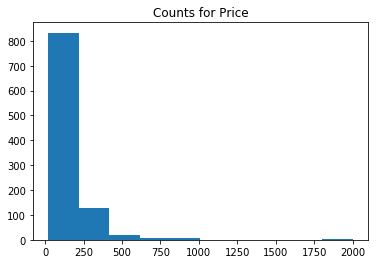

In [21]:
plt.hist(cal['price'].sample(1000))
#plt.xscale('log')
plt.title("Counts for Price")


Text(0.5,1,'Counts for log(Price)')

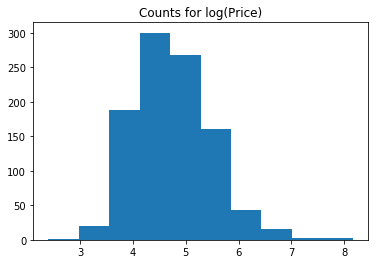

In [20]:
plt.hist(cal['log_price'].sample(1000))
plt.title("Counts for log(Price)")

In [31]:
#cal['date'] = pd.to_datetime(cal['date'])
cal['date'] = cal['date'].dt.date

In [32]:
average_per_day = []

# unique dates in calendar dataset 
unique_days = cal['date'].unique()

# find the average price on every day
for i in range(len(unique_days)):
    temp = cal['price'][cal['date'] == unique_days[i]]
    average_per_day.append([unique_days[i],temp.mean()])

# sort days   
average_per_day = sorted(average_per_day)

# create df
df = pd.DataFrame(average_per_day, columns = ['date','average_price']) 
df.head()

,date,average_price
0,2019-09-12,127.187340
1,2019-09-13,155.549995
2,2019-09-14,156.315694
3,2019-09-15,151.762072
4,2019-09-16,152.233318


Text(0,0.5,'Average Price')

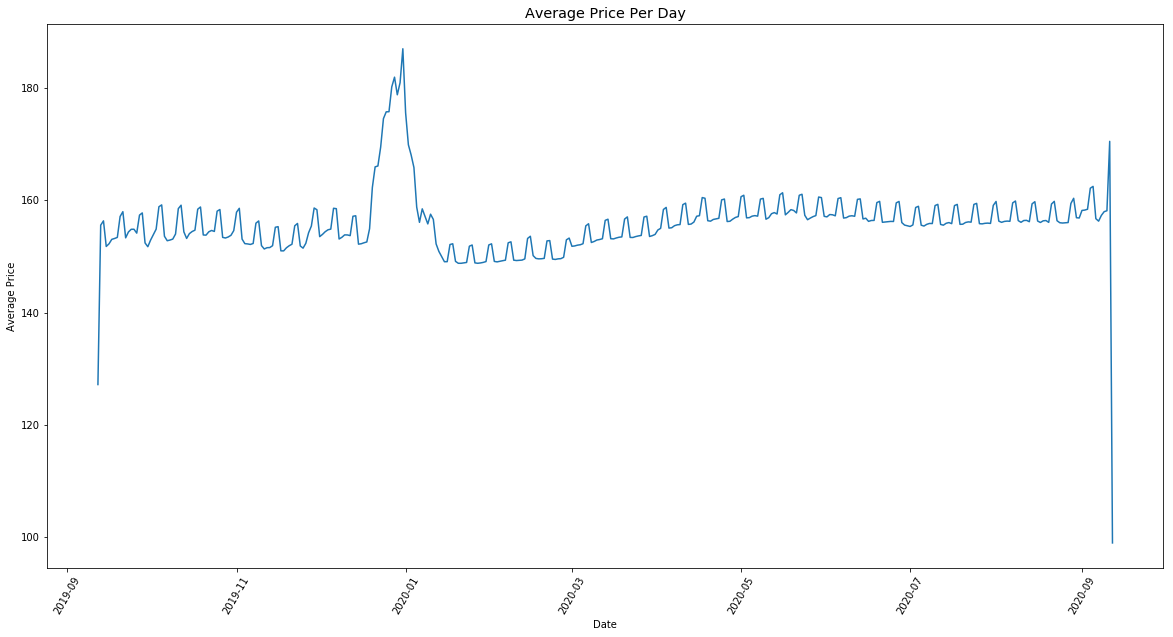

In [24]:
plt.figure(figsize=(20,10))
plt.plot(df['date'], df['average_price'])
plt.style.use('ggplot')
#plt.xlim(0, 365)
plt.title('Average Price Per Day')
plt.xlabel('Date')
plt.xticks(rotation=60)
plt.ylabel('Average Price')

**Analysis:** From the graph, is it interesting to see the average prices through the calendar year. It's clear that during the Christmas/New Year holidays that a price spike occurs. This makes sense, because of the popularity of New York during this time (ball drop, etc.) Additionally we see spikes numerous spikes throughout the calendar year, which makes sense because Airbnb listings during the weekend are more pricey.

In [30]:
cal['date'].dt.date

0    2019-09-13
1    2019-09-13
2    2019-09-14
3    2019-09-15
4    2019-09-16
Name: date, dtype: object